In [103]:
import re
import sys
import json
import numpy
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("/home/apis/nykaa")
from pas.v2.utils import Utils
%matplotlib inline

In [104]:
conn = Utils.mysqlConnection()
query = "SELECT * FROM popularity"
df = pd.DataFrame(Utils.fetchResults(conn, query))
conn.close()

In [105]:
def normalize(a):
    return (a-min(a))/(max(a)-min(a))

In [106]:
df['Vn'] = normalize(df['views'])
df['Cn'] = normalize(df['cart_additions'])
df['On'] = normalize(df['orders'])

In [151]:
df['popularity'] = normalize(numpy.log(1 + df['Vn'] + 2*df['Cn'] + 3*df['On'])) * 100

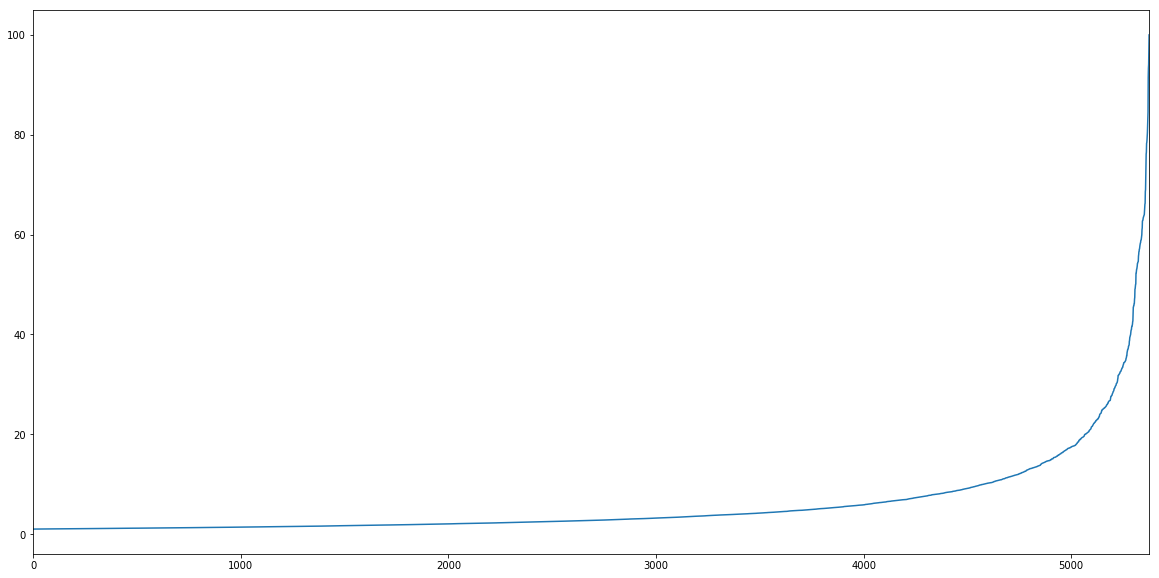

In [161]:
    f = plt.figure(figsize=(20,10))
    df['popularity'][df.popularity>1].sort_values().plot(use_index=False)

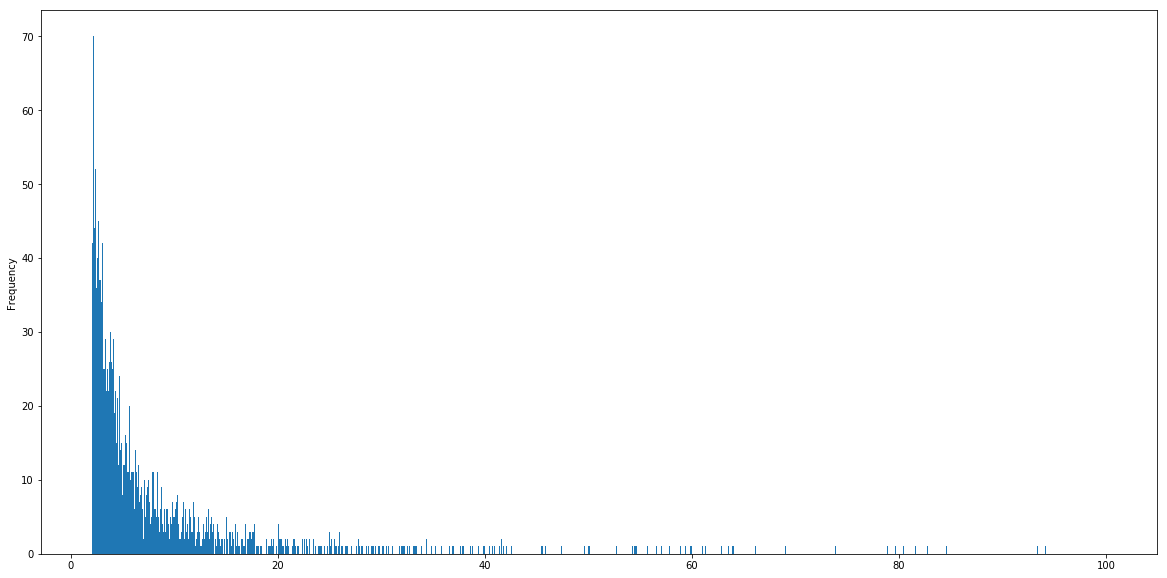

In [173]:
f = plt.figure(figsize=(20,10))
df['popularity'][df.popularity>2].plot.hist(bins=2000)